## 作業part 1：試著爬取所有貨幣對台幣的匯率

In [1]:
import requests
from bs4 import BeautifulSoup as bs
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
req = requests.get(url)
req.encoding = 'utf-8'
soup = bs(req.text, 'lxml')
soup

<!DOCTYPE html>
<html class="no-js" lang="zh-TW">
<head>
<meta charset="utf-8"/>
<title>臺灣銀行牌告匯率</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="臺灣銀行匯率利率黃金牌價查詢" name="description"/>
<meta content="" name="keywords"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="index,follow" name="robots"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="/Content/css/font-awesome.min.css" rel="stylesheet"/>
<link href="/Content/css/jquery-ui.min.css" rel="stylesheet"/>
<link href="/Content/main-3.3.0.css" rel="stylesheet"/>
<style>
        h1.hero__header_small {
            font-size: 26px;
            margin: 12px 0;
        }

            h1.hero__header_eng {
                font-size: 20px;
                margin: -8px 0;
            }

        .chart-key-value .sp {
            position: relative;
            top: 2px;
        }

   

In [3]:
soup.find('table', attrs={'title': '牌告匯率'}).find('tbody').find_all('tr')

[<tr>
 <td class="currency phone-small-font" data-table="幣別">
 <div>
 <div class="sp-div sp-america-div">
 <img alt="幣別國旗" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
 </div>
 <br class="visible-phone print_hide"/>
 <div class="visible-phone print_hide">
                                 美金 (USD)
                             </div>
 <div class="hidden-phone print_show" style="text-indent:30px;">
                                 美金 (USD)
                             </div>
 </div>
 </td>
 <td class="rate-content-cash text-right print_hide" data-table="本行現金買入">28.4</td>
 <td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">29.07</td>
 <td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">28.75</td>
 <td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">28.85</td>
 <td class="text-center print_hide phone-small-font" data-table="遠期匯率買入/賣出"><a href="/xrt/forw

In [32]:
html = soup.find('table', attrs = {'title' : '牌告匯率'}).find('tbody').find_all('tr')
for d in html:
    print(d.find('div', attrs = {'class' : "visible-phone print_hide"}).text.replace(" ", "").replace('\r\n',''))
    print("本行現金買入", d.find('td', attrs = {'data-table' : "本行現金買入"}).text)
    print("本行現金賣出", d.find('td', attrs = {'data-table' : "本行現金賣出"}).text)
    print('-------------------------')

美金(USD)
本行現金買入 28.4
本行現金賣出 29.07
-------------------------
港幣(HKD)
本行現金買入 3.558
本行現金賣出 3.762
-------------------------
英鎊(GBP)
本行現金買入 36.98
本行現金賣出 39.1
-------------------------
澳幣(AUD)
本行現金買入 20.58
本行現金賣出 21.36
-------------------------
加拿大幣(CAD)
本行現金買入 21.53
本行現金賣出 22.44
-------------------------
新加坡幣(SGD)
本行現金買入 20.85
本行現金賣出 21.76
-------------------------
瑞士法郎(CHF)
本行現金買入 30.83
本行現金賣出 32.03
-------------------------
日圓(JPY)
本行現金買入 0.268
本行現金賣出 0.2808
-------------------------
南非幣(ZAR)
本行現金買入 -
本行現金賣出 -
-------------------------
瑞典幣(SEK)
本行現金買入 2.97
本行現金賣出 3.49
-------------------------
紐元(NZD)
本行現金買入 19.45
本行現金賣出 20.3
-------------------------
泰幣(THB)
本行現金買入 0.8227
本行現金賣出 1.0127
-------------------------
菲國比索(PHP)
本行現金買入 0.523
本行現金賣出 0.656
-------------------------
印尼幣(IDR)
本行現金買入 0.00168
本行現金賣出 0.00238
-------------------------
歐元(EUR)
本行現金買入 33.37
本行現金賣出 34.71
-------------------------
韓元(KRW)
本行現金買入 0.02405
本行現金賣出 0.02795
-------------------------
越南盾(VND)
本行現金買入 0.00087
本行現金賣出 

##  作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


In [35]:
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
req = requests.get(url)
soup = bs(req.text)
html = soup.find('table', attrs = {'title' : '牌告匯率'}).find('tbody').find_all('tr')
# print(html)

[<tr>
<td class="currency phone-small-font" data-table="幣別">
<div>
<div class="sp-div sp-america-div">
<img alt="幣別國旗" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
</div>
<br class="visible-phone print_hide"/>
<div class="visible-phone print_hide">
                                美金 (USD)
                            </div>
<div class="hidden-phone print_show" style="text-indent:30px;">
                                美金 (USD)
                            </div>
</div>
</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金買入">28.125</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">28.795</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">28.45</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">28.6</td>
<td class="text-center print_hide phone-small-font" data-table="遠期匯率買入/賣出"><a href="/xrt/forward/USD">查詢</a></

美金(USD)
https://rate.bot.com.tw/xrt/history/USD


<Figure size 1152x720 with 0 Axes>

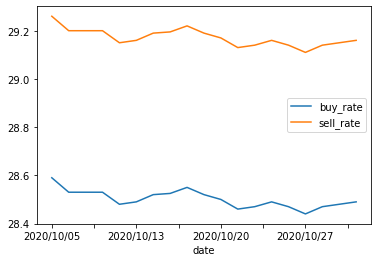

In [177]:
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
req = requests.get(url)
soup = bs(req.text)
html = soup.find('table', attrs = {'title' : '牌告匯率'}).find('tbody').find_all('tr')
# print(html)

for d in html:
    
    # 擷取匯率表格，把美金擷取出來，查詢其歷史匯率
    currency = d.find('div', attrs = {'class' : "visible-phone print_hide"}).text.replace(" ", "").replace('\r\n','')
    print(currency)
    
    # 找該貨幣的歷史資料首頁
    history = d.find('td', attrs = {'data-table' : "歷史匯率"}).a['href']
    history_link = "https://rate.bot.com.tw" + history
    print(history_link)
    
    # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料,(https://rate.bot.com.tw/xrt/quote/2020-10/USD/spot/1)
    quote_history_link = history_link.replace("history", 'quote/2020-10')
#     print(quote_history_link)
    
    hist_req = requests.get(quote_history_link)
    soup_req = bs(hist_req.text)
    history_table = soup_req.find('table', attrs = {'title' : "歷史本行營業時間牌告匯率"}).find('tbody').find_all('tr')
#     print(history_table)


    # 取日期，買價，賣價
    date_history = list()
    history_sell = list()
    history_buy = list()
    for rate in history_table: 
        # 擷取日期資料
        date_history.append(rate.find(class_ = 'text-center').text)    
        # 歷史買入匯率
        history_buy.append(float(rate.find_all('td', attrs = {'class' : 'rate-content-cash text-right print_table-cell'})[0].text))
        # 歷史賣出匯率
        history_sell.append(float(rate.find_all('td', attrs = {'class' : 'rate-content-cash text-right print_table-cell'})[1].text))

#     print('date', date_history)
#     print('sell', history_sell)
#     print('buy', history_buy)

    # 先做成DataFrame
    history_rate = pd.DataFrame({'date':date_history, 'buy_rate':history_buy, 'sell_rate':history_sell})
    
    # 指定日期欄位為datafram的index
    history_rate = history_rate.set_index('date')
    history_rate = history_rate.sort_index(ascending=True)    
#     print(history_rate)    
    
    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(16, 10))
    history_rate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
#     plt.legend(loc="upper left")
    plt.show()
    
    break
